In [42]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk


In [43]:
# import data
df = pd.read_csv("dataset.csv")

In [44]:
# delete all stop word by using nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def tokenize(text):
    text = text.lower() 
    text = re.sub(r'[^a-zA-Z\s]', '', text)  
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]  
    return tokens
    return tokens

all_tokens = []
for desc in df['description'].dropna(): 
    all_tokens.extend(tokenize(desc))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


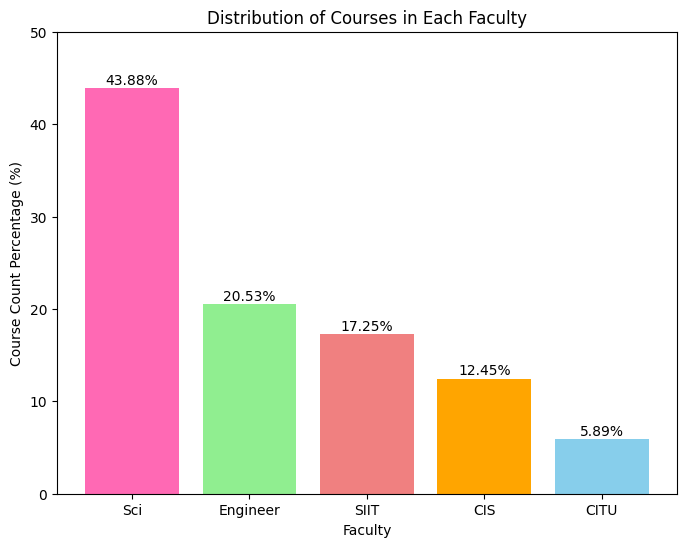

In [45]:
# plot the proportions of all code
faculty_count = df['faculty'].value_counts()
faculty_count

labels = ['Sci', 'Engineer', 'SIIT', 'CIS', 'CITU']

total = sum(faculty_count)

faculty_percentage = [(count / total) * 100 for count in faculty_count]

plt.figure(figsize=(8, 6))

colors = ['hotpink', 'lightgreen', 'lightcoral', 'orange', 'skyblue']

bars = plt.bar(labels, faculty_percentage, color=colors)

plt.title('Distribution of Courses in Each Faculty')
plt.xlabel('Faculty')
plt.ylabel('Course Count Percentage (%)')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, f'{yval:.2f}%', ha='center', va='bottom', fontsize=10)

plt.gca().set_ylim(0, 50)

plt.xticks(rotation=0)  
plt.show()

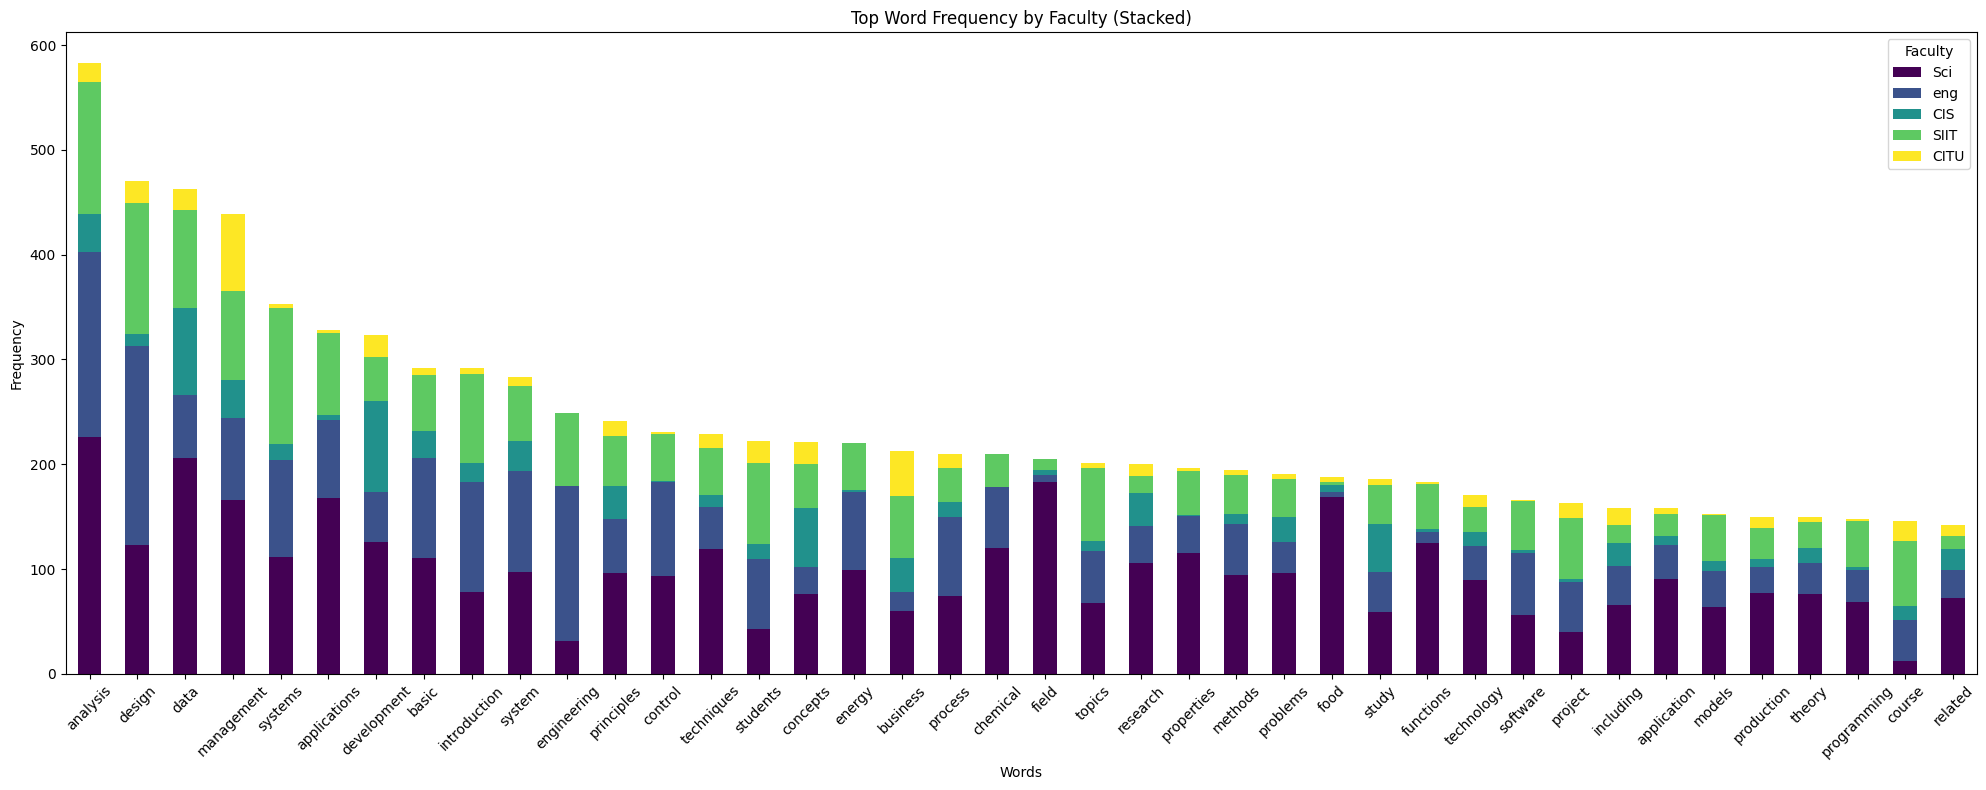

In [50]:
# plot top word and proportions of all code for each word
word_faculty_map = defaultdict(lambda: defaultdict(int))
for desc, faculty in zip(df['description'], df['faculty']):
    tokens = tokenize(desc)
    for token in tokens:
        word_faculty_map[token][faculty] += 1

word_faculty_df = pd.DataFrame(word_faculty_map).T.fillna(0)

top_words = word_faculty_df.sum(axis=1).sort_values(ascending=False).head(40).index
top_word_faculty_df = word_faculty_df.loc[top_words]

faculty_mapping = {
    'sci': 'Sci',
    'end': 'TSM',
    'si': 'SIIT',
    'cis': 'CIS',
    'inno': 'CITU'
}

top_word_faculty_df = top_word_faculty_df.rename(columns=faculty_mapping)

top_word_faculty_df.plot(kind='bar', stacked=True, figsize=(20, 8), colormap='viridis')
plt.title('Top Word Frequency by Faculty (Stacked)')
plt.ylabel('Frequency')
plt.xlabel('Words')
plt.xticks(rotation=45)
plt.legend(title='Faculty')
plt.tight_layout()
plt.show()